In [ ]:
import pandas as pd
import time
import seaborn as sns
from plotnine import ggplot

In [ ]:
# non-lru_cache fibonacci implementation
def fibonacci(n):
    if n == 1 or n == 2: return 1
    return fibonacci(n-1) + fibonacci(n-2)

In [ ]:
# test function
print("Testing...")
print("n = 2, should be 1:", fibonacci(2))
print("n = 3, should be 2:", fibonacci(3))
print("n = 10, should be 55:", fibonacci(10))

Testing...
n = 2, should be 1: 1
n = 3, should be 2: 2
n = 10, should be 55: 55


In [ ]:
# lru_cache fibonacci implementation
def lru_fibonacci(n, d):
    if n == 1 or n == 2: return 1
    if n not in d: d[n] = lru_fibonacci(n-1, d) + lru_fibonacci(n-2, d)
    return d[n]

In [ ]:
# test function
# add realization about could do d={} after consulting slides in readme
print("Testing...")
d = {}
print("n = 2, should be 1:", lru_fibonacci(2, d))
print("n = 3, should be 2:", lru_fibonacci(3, d))
print("n = 10, should be 55:", lru_fibonacci(10, d))

Testing...
n = 2, should be 1: 1
n = 3, should be 2: 2
n = 10, should be 55: 55


In [ ]:
# reimplementing above two functions to reflect runtime as a function of n
time_fibo = {}
time_lru = {}

def timed_fibonacci(n):
    start = time.time()
    ret = fibonacci(n)
    time_fibo[n] = time.time() - start
    return ret

def timed_lru_fibonacci(n, d):
    start = time.time()
    ret = lru_fibonacci(n, d)
    time_lru[n] = time.time() - start
    return ret

In [ ]:
# getting some data from both algorithms
timed_fibonacci(2)
timed_fibonacci(10)
timed_fibonacci(30)
timed_fibonacci(40)
timed_fibonacci(50)
# timed_fibonacci(70)
# timed_fibonacci(90)
# timed_fibonacci(100)
print(time_fibo)

{2: 0.0, 10: 0.0, 30: 0.10372114181518555, 50: 1510.9152822494507, 40: 12.661979675292969}


In [ ]:
# add one more entry to fib
timed_fibonacci(45)
print(time_fibo)

{2: 0.0, 10: 0.0, 30: 0.10372114181518555, 50: 1510.9152822494507, 40: 12.661979675292969, 45: 139.33661651611328}


In [ ]:
timed_lru_fibonacci(2, d={})
timed_lru_fibonacci(10, d={})
timed_lru_fibonacci(30, d={})
timed_lru_fibonacci(40, d={})
timed_lru_fibonacci(45, d={})
timed_lru_fibonacci(50, d={})
timed_lru_fibonacci(70, d={})
timed_lru_fibonacci(90, d={})
timed_lru_fibonacci(100, d={})
timed_lru_fibonacci(200, d={})
timed_lru_fibonacci(300, d={})
timed_lru_fibonacci(500, d={})
timed_lru_fibonacci(700, d={})
timed_lru_fibonacci(900, d={})
timed_lru_fibonacci(1000, d={})
print(time_lru)

{2: 0.0, 10: 0.0, 30: 0.0, 50: 0.0, 70: 0.0, 90: 0.0, 100: 0.0, 200: 0.0, 300: 0.0, 500: 0.0, 700: 0.0, 900: 0.0, 1000: 0.0009970664978027344, 40: 0.0, 45: 0.0}


In [ ]:
# organize dictionaries of runtime into dataframes
df_fib = pd.DataFrame.from_dict(data=time_fibo, orient='index').reset_index()
df_fib.columns=['n', 'seconds']
df_fib.head(6)

,n,seconds
0,2,0.000000
1,10,0.000000
2,30,0.103721
3,50,1510.915282
4,40,12.661980
5,45,139.336617


In [ ]:
df_lru = pd.DataFrame.from_dict(data=time_lru, orient='index').reset_index()
df_lru.columns=['n', 'seconds']
df_lru.head(15)

,n,seconds
0,2,0.000000
1,10,0.000000
2,30,0.000000
3,50,0.000000
4,70,0.000000
5,90,0.000000
6,100,0.000000
7,200,0.000000
8,300,0.000000
9,500,0.000000


In [ ]:
# merge dataframes
df_runtime = df_fib.merge(df_lru, on='n', how='outer')
df_runtime.columns = ['n', 'fib_seconds', 'lru_seconds']

# sort by the n values
df_runtime.sort_values(by=['n'])
df_runtime.head(15)

,n,fib_seconds,lru_seconds
0,2,0.000000,0.000000
1,10,0.000000,0.000000
2,30,0.103721,0.000000
3,50,1510.915282,0.000000
4,40,12.661980,0.000000
5,45,139.336617,0.000000
6,70,NaN,0.000000
7,90,NaN,0.000000
8,100,NaN,0.000000
9,200,NaN,0.000000


<AxesSubplot:xlabel='n', ylabel='seconds'>

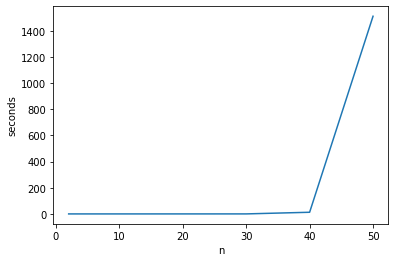

In [ ]:
# plot runtime graph for fib
time_fib_plt = sns.lineplot(data=df_fib, x='n', y='seconds')
time_fib_plt

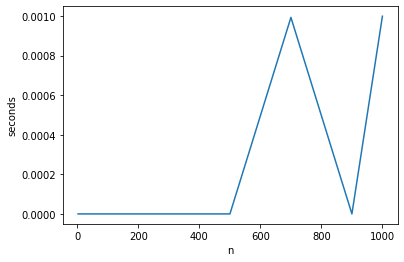

In [ ]:
# plot runtime graph for lru_fib
time_lru_plot = sns.lineplot(data=df_lru, x='n', y='seconds')

C:\Users\olina\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


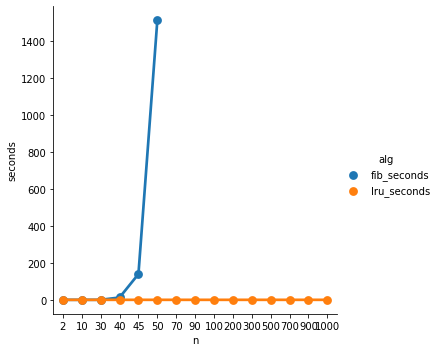

In [ ]:
# plot two graphs together using same scale for y axis
df_melted = df_runtime.melt('n', var_name='alg',  value_name='seconds')
time_plt = sns.factorplot(x="n", y="seconds", hue='alg', data=df_melted)
time_plt